# IMport data

In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/beijing-multisite-airquality-data-set")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yohan\.cache\kagglehub\datasets\sid321axn\beijing-multisite-airquality-data-set\versions\1


# Imports

In [162]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data analysis

hello world
count    34139.000000
mean        82.773611
std         82.135694
min          3.000000
25%         22.000000
50%         58.000000
75%        114.000000
max        898.000000
Name: PM2.5, dtype: float64


(array([8.012e+03, 4.883e+03, 3.821e+03, 3.342e+03, 2.869e+03, 2.244e+03,
        1.800e+03, 1.395e+03, 1.136e+03, 8.960e+02, 7.100e+02, 5.280e+02,
        4.700e+02, 4.310e+02, 3.410e+02, 2.540e+02, 1.920e+02, 1.960e+02,
        1.220e+02, 1.000e+02, 6.200e+01, 5.200e+01, 5.000e+01, 4.300e+01,
        2.900e+01, 3.500e+01, 2.900e+01, 2.500e+01, 1.400e+01, 1.100e+01,
        1.100e+01, 4.000e+00, 9.000e+00, 4.000e+00, 6.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  3. ,  20.9,  38.8,  56.7,  74.6,  92.5, 110.4, 128.3, 146.2,
        164.1, 182. , 199.9, 217.8, 235.7, 253.6, 271.5, 289.4, 307.3,
        325.2, 343.1, 361. , 378.9, 396.8, 414.7, 432.6, 450.5, 468.4,
        486.3, 504.2, 522.1, 540. , 557.9, 575.8, 593.7, 611.6, 629.5,
        647.4, 665.3, 683.2, 701.1, 719. , 736.9, 754.8, 772.7, 790.6,
        808.5, 826.4,

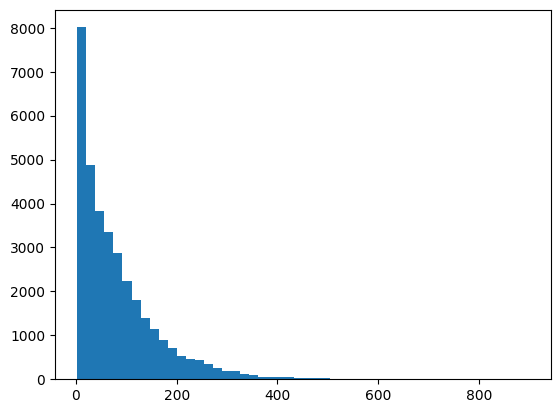

In [121]:
print("hello world")

df = pd.read_csv(os.path.join(path, "PRSA_Data_Aotizhongxin_20130301-20170228.csv"))
df=df.drop('No', axis=1)
airpoll = df['PM2.5']
print(airpoll.describe())
# boxplot of PM2.5 levels
plt.hist(airpoll.dropna(), bins=50)



In [122]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


data shape
five number summary
null values sum
data type

In [123]:
print(df.shape)
print(airpoll.describe())
print(df.isna().sum())
df.head()
df.dtypes

(35064, 17)
count    34139.000000
mean        82.773611
std         82.135694
min          3.000000
25%         22.000000
50%         58.000000
75%        114.000000
max        898.000000
Name: PM2.5, dtype: float64
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [160]:
numericalData=df.drop(['wd','station'], axis=1)
corr=numericalData.corr() 
s=corr.unstack()
s=s[s.index.get_level_values(0)!=s.index.get_level_values(1)]
strong = s[s.abs() >= 0.3]

pm2_5_corr=strong['PM2.5']
strong=strong[strong.index.get_level_values(0) < strong.index.get_level_values(1)]
strong=[(L0,L1,x)  for x, L0, L1 in zip(strong, strong.index.get_level_values(0), strong.index.get_level_values(1))]
strong

[('PM2.5', 'SO2', 0.4810248596456966),
 ('PM10', 'PM2.5', 0.8791042340567334),
 ('PM10', 'SO2', 0.46904495983575195),
 ('SO2', 'TEMP', -0.35060803924002376),
 ('NO2', 'PM2.5', 0.6849855170938765),
 ('NO2', 'PM10', 0.6523246021746044),
 ('NO2', 'SO2', 0.4320805911405682),
 ('NO2', 'O3', -0.5003796908553296),
 ('NO2', 'WSPM', -0.49157032148635305),
 ('CO', 'PM2.5', 0.7850062363792475),
 ('CO', 'PM10', 0.6804040309275513),
 ('CO', 'SO2', 0.5402749001434087),
 ('CO', 'NO2', 0.6902021065178178),
 ('CO', 'O3', -0.32646153520343024),
 ('CO', 'TEMP', -0.3668983346668117),
 ('O3', 'TEMP', 0.5890629893980431),
 ('O3', 'PRES', -0.4242943490490421),
 ('O3', 'WSPM', 0.34110008754930154),
 ('PRES', 'TEMP', -0.8271334117224679),
 ('DEWP', 'TEMP', 0.8230986068826975),
 ('DEWP', 'PRES', -0.7763843487755914),
 ('DEWP', 'WSPM', -0.30506325887942376)]

In [161]:
pm2_5_corr

PM10    0.879104
SO2     0.481025
NO2     0.684986
CO      0.785006
dtype: float64

In [ ]:
def diagnose_mv(df, mv_column):
    df_no_null = df[df[mv_column].notnull()]

    for col in df.columns:
        sAll = pd.to_numeric(df[col], errors='coerce')
        sNonnull = pd.to_numeric(df_no_null[col].dropna(), errors='coerce')

        if pd.api.types.is_numeric_dtype(df[col]):

            bins = np.histogram_bin_edges(sAll.dropna())

            countsAll, _   = np.histogram(sAll,    bins=bins)
            countsNonnull, _ = np.histogram(sNonnull, bins=bins)
            diff = np.abs(countsAll - countsNonnull)
            missingness= diff/countsAll
            data=np.vstack([diff, countsNonnull]).T
            '''
            if col != mv_column:
                chi2, p, dof, expected = chi2_contingency(data)
                print("Chi2 statistic:", chi2)
                print("degree of freedom: ",dof)
                print("p-value:", p)
            '''
            print(missingness*100)
            # plot
            fig, axes = plt.subplots(1, 3, figsize=(8, 2))

            bin_centers = 0.5 * (bins[1:] + bins[:-1])
            bin_widths  = np.diff(bins)

            axes[0].hist(sAll,    bins=bins)
            axes[1].hist(sNonnull.dropna(), bins=bins)
            axes[2].bar(bin_centers, diff, width=bin_widths, alpha=0.3, align='center')

            for ax in axes:
                ax.set_xticks(bin_centers)
                ax.set_xticklabels(bin_centers.astype(int))

            axes[0].set_title(f"{col} — all")
            axes[1].set_title(f"{col} — without MV")
            axes[2].set_title("|Δ count| per bin")
            plt.tight_layout()
            plt.show()

        else:

            vc_all = df[col].value_counts(dropna=False) #seriese of bin counts
            vc_non = df_no_null[col].value_counts(dropna=False)

            # align categories incase one category have no values, so diff do not return error
            cats = vc_all.index.union(vc_non.index) #
            c_all = vc_all.reindex(cats, fill_value=0)
            c_non = vc_non.reindex(cats, fill_value=0)
            diff = (c_all - c_non).abs()
            missingness= diff/c_all
            '''
            data=np.vstack([diff, c_non]).T
            if col != mv_column:
                chi2, p, dof, expected = chi2_contingency(data)
                print("Chi2 statistic:", chi2)
                print("degree of freedom: ",dof)
                print("p-value:", p)
            '''
            print(missingness*100)
            x = np.arange(len(cats)) # number of categories/ bins
            print(x)
            w = 0.8

            fig, axes = plt.subplots(1, 3, figsize=(8, 2))

            axes[0].bar(x, c_all.values, width=w)
            axes[1].bar(x, c_non.values, width=w)
            axes[2].bar(x, diff.values,  width=w, alpha=0.3)


            for ax in axes:
                ax.set_xticks(x)
                ax.set_xticklabels(cats.astype(str), rotation=45, ha='right')

            axes[0].set_title(f"{col} — all")
            axes[1].set_title(f"{col} — without MV")
            axes[2].set_title("|Δ count| per category")
            plt.tight_layout()
            plt.show()

